## Import modules and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

sns.set()

In [2]:
data = np.array([
        [0.024, 11.7], 
        [0.038, 12.7], 
        [0.04, 15.5], 
        [0.045, 16.8], 
        [0.047, 16.7], 
        [0.0578, 17.5], 
        [0.0629, 18.5], 
        [0.0629, 18.7], 
        [0.063, 18.8], 
        [0.064, 19.5], 
        [0.0678, 20.8], 
        [0.0691, 20.3], 
        [0.071, 23.3], 
        [0.0742, 23.2],
        [0.0752, 23.7], 
        [0.077, 24.4], 
        [0.0779, 28.9], 
        [0.0781, 25.8], 
        [0.0787, 29.5], 
        [0.0789, 23.3], 
        [0.0791, 22.5], 
        [0.0862, 26.2], 
        [0.0867, 29.7], 
        [0.0877, 33.8], 
        [0.089, 35], 
        [0.0897, 32], 
        [0.096, 40], 
        [0.098, 41], 
        [0.099, 43.8]
])

## Preprocess and check data

In [3]:
df = pd.DataFrame(data, columns=["water", "hair"])
x, y = np.array(df["water"]).reshape(-1, 1), np.array(df["hair"])
print(f"Pearson correlation: {round(df.corr().iloc[1, 0], 2)}")
df.head()

Pearson correlation: 0.91


,water,hair
0,0.024,11.7
1,0.038,12.7
2,0.040,15.5
3,0.045,16.8
4,0.047,16.7


## Linear Regression

In [4]:
model = LinearRegression()
model.fit(x, y)
lin_sc = round(model.score(x, y), 2)
print(f"Модель: y = {round(model.coef_[0], 2)}*x + {round(model.intercept_, 2)}")
print(f"Коєфіцієнт детермінації: {lin_sc}")
df.assign(pred_hair=np.round(model.predict(x), 2)).head()

Модель: y = 401.12*x + -3.94
Коєфіцієнт детермінації: 0.82


,water,hair,pred_hair
0,0.024,11.7,5.69
1,0.038,12.7,11.30
2,0.040,15.5,12.10
3,0.045,16.8,14.11
4,0.047,16.7,14.91


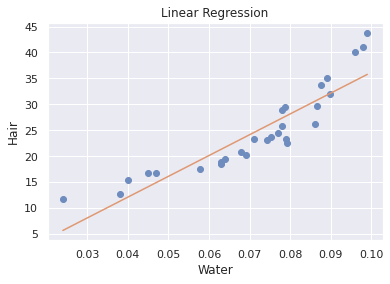

In [5]:
plt.scatter(x, y, color='#6e8cbe')
plt.plot(x, model.predict(x), color='#df9872')
plt.title('Linear Regression')
plt.xlabel('Water')
plt.ylabel('Hair')
plt.show()

## Polynomial Regression

In [6]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x_, y)
p_sc = round(model.score(x_, y), 2)
print(f"Модель: y = {round(model.intercept_, 2)} + ({round(model.coef_[0], 2)}*x) + ({round(model.coef_[1], 2)} * x^2)")
print(f"Коєфіцієнт детермінації: {p_sc}")
df.assign(pred_hair=np.round(model.predict(x_), 2)).head()

Модель: y = 22.06 + (-481.84*x) + (6815.43 * x^2)
Коєфіцієнт детермінації: 0.94


,water,hair,pred_hair
0,0.024,11.7,14.42
1,0.038,12.7,13.59
2,0.040,15.5,13.69
3,0.045,16.8,14.18
4,0.047,16.7,14.47


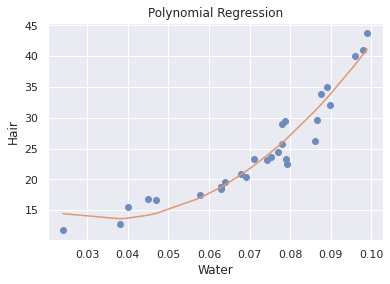

In [7]:
plt.scatter(x, y, color='#6e8cbe')
plt.plot(x, model.predict(x_), color='#df9872')
plt.title('Polynomial Regression')
plt.xlabel('Water')
plt.ylabel('Hair')
plt.show()

## Logarithmic Regression

In [8]:
x_ = FunctionTransformer(np.log, validate=True).fit_transform(x)
model = LinearRegression().fit(x_, y)
log_sc = round(model.score(x_, y), 2)
print(f"Модель: y = {round(model.intercept_, 2)} + ({round(model.coef_[0], 2)} * ln(x))")
print(f"Коєфіцієнт детермінації: {log_sc}")
df.assign(pred_hair=np.round(model.predict(x_), 2)).head()

Модель: y = 81.7 + (21.25 * ln(x))
Коєфіцієнт детермінації: 0.68


,water,hair,pred_hair
0,0.024,11.7,2.43
1,0.038,12.7,12.19
2,0.040,15.5,13.28
3,0.045,16.8,15.79
4,0.047,16.7,16.71


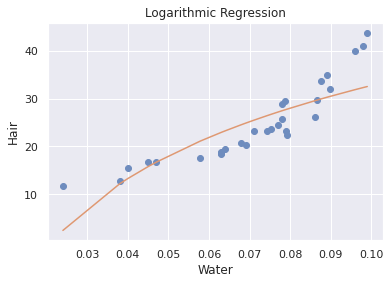

In [9]:
plt.scatter(x, y, color='#6e8cbe')
plt.plot(x, model.predict(x_), color='#df9872')
plt.title('Logarithmic Regression')
plt.xlabel('Water')
plt.ylabel('Hair')
plt.show()

## Exponential Regression

In [10]:
y_ = FunctionTransformer(np.log, validate=True).fit_transform(y.reshape(-1, 1))
model = LinearRegression().fit(x, y_)
e_sc = round(model.score(x, y_), 2)
print(f"Модель: y = {round(np.exp(model.intercept_)[0], 2)} * ({round(np.exp(model.coef_[0])[0], 2)} ^ x)")
print(f"Коєфіцієнт детермінації: {e_sc}")
df.assign(pred_hair=np.round(np.exp(model.predict(x)), 2)).head()

Модель: y = 6.93 * (25448819.64 ^ x)
Коєфіцієнт детермінації: 0.92


,water,hair,pred_hair
0,0.024,11.7,10.43
1,0.038,12.7,13.25
2,0.040,15.5,13.71
3,0.045,16.8,14.93
4,0.047,16.7,15.44


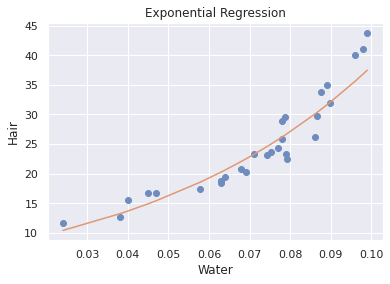

In [11]:
plt.scatter(x, y, color='#6e8cbe')
plt.plot(x, np.exp(model.predict(x)), color='#df9872')
plt.title('Exponential Regression')
plt.xlabel('Water')
plt.ylabel('Hair')
plt.show()

## Conclusion

In [12]:
results = {"Method": ["Linear Regression", "Polynomial Regression", "Logarithmic Regression", "Exponential Regression"],
           "Coefficient of determination": [lin_sc, p_sc, log_sc, e_sc]}
resdf = pd.DataFrame(results)
resdf.sort_values(by=["Coefficient of determination"], ascending=False)

,Method,Coefficient of determination
1,Polynomial Regression,0.94
3,Exponential Regression,0.92
0,Linear Regression,0.82
2,Logarithmic Regression,0.68
